In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

from tensorflow.keras.datasets import mnist

In [2]:
(X_train,y_train),(X_test,y_test) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
single_image = X_train[0]

In [5]:
single_image.shape

(28, 28)

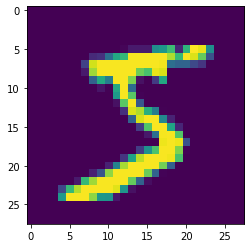

In [6]:
plt.imshow(single_image)

In [7]:
from tensorflow.keras.utils import to_categorical

In [8]:
y_example = to_categorical(y_train)

In [9]:
y_example.shape

(60000, 10)

In [10]:
y_cat_test = to_categorical(y_test,num_classes=10)

In [11]:
y_cat_train = to_categorical(y_train,10)

In [12]:
single_image.max()

255

In [13]:
single_image.min()

0

In [14]:
X_train = X_train/255
X_test = X_test/255

In [15]:
scaled_image = X_train[0]

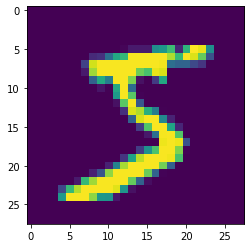

In [16]:
plt.imshow(scaled_image)

In [17]:
# batch_size,width,height,color_channels
X_train = X_train.reshape(60000,28,28,1)

In [18]:
X_test = X_test.reshape(10000,28,28,1)

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,MaxPool2D,Flatten

In [20]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',))
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
   
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))
    
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [21]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=1)
model.fit(X_train,y_cat_train,epochs=10,validation_data=(X_test,y_cat_test),callbacks=[early_stop])

Epoch 1/10
1875/1875 [==============================] - 45s 23ms/step - loss: 0.1376 - accuracy: 0.9583 - val_loss: 0.0552 - val_accuracy: 0.9820
Epoch 2/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0486 - accuracy: 0.9847 - val_loss: 0.0417 - val_accuracy: 0.9867
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0315 - accuracy: 0.9905 - val_loss: 0.0388 - val_accuracy: 0.9880
Epoch 4/10
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0211 - accuracy: 0.9934 - val_loss: 0.0510 - val_accuracy: 0.9833


In [22]:
metric = pd.DataFrame(model.history.history)

<AxesSubplot:>

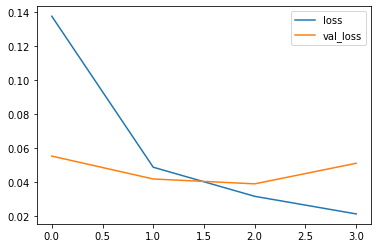

In [23]:
metric[['loss','val_loss']].plot()

<AxesSubplot:>

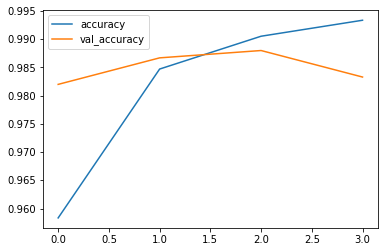

In [24]:
metric[['accuracy','val_accuracy']].plot()

In [25]:
from sklearn.metrics import classification_report,confusion_matrix

In [26]:
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)

313/313 [==============================] - 3s 8ms/step


In [27]:
print(classification_report(y_test,classes_x))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       980
           1       1.00      0.99      0.99      1135
           2       0.99      0.98      0.99      1032
           3       0.94      1.00      0.97      1010
           4       0.99      0.98      0.99       982
           5       0.99      0.96      0.98       892
           6       1.00      0.98      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.99      0.97      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [28]:
print(confusion_matrix(y_test,classes_x))

[[ 978    0    0    1    0    0    0    0    1    0]
 [   0 1127    2    2    0    0    1    1    1    1]
 [   3    1 1012    8    1    0    0    4    2    1]
 [   0    0    0 1008    0    0    0    1    0    1]
 [   1    0    1    0  966    0    0    1    0   13]
 [   0    0    1   31    0  855    1    0    2    2]
 [   6    1    0    2    3    4  939    0    3    0]
 [   1    1    4    3    0    0    0 1010    2    7]
 [   2    1    2   12    1    2    1    0  943   10]
 [   2    1    0    6    2    0    0    3    0  995]]
